# Random Walks about London


You can easily retrieve a graph (NetworkX) representation of London locality using the `osmnx` library. Say that you're only looking to walk a short distance, say < 1 km. You can use the `graph_from_point`.

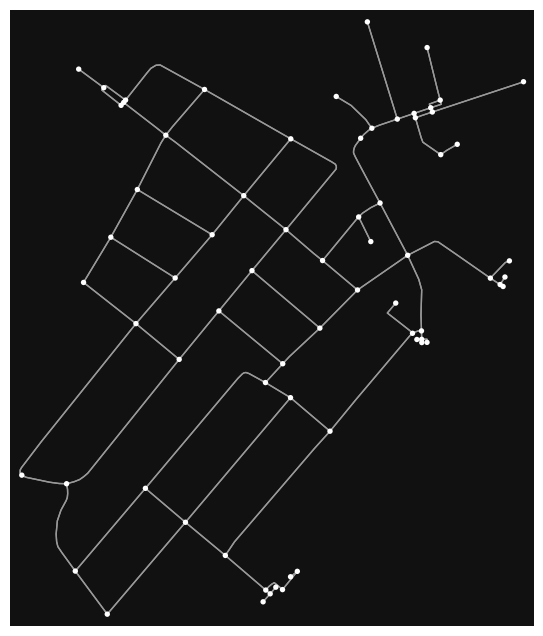

In [7]:
import osmnx as ox
from web_map import open_google_maps
START = (51.564, 0.00227) # (latitude, longitude), not my real address

G = ox.graph.graph_from_point(START, network_type="walk", dist=500, dist_type="network")

fig, ax = ox.plot_graph(G)
open_google_maps(START, open_in='inline')

For larger examples, like the size of Greater London, Pyrosm is recommended. I would recommend locally downloading the OSM data through [this Geofabrik link](https://download.geofabrik.de/europe/united-kingdom/england/greater-london-latest.osm.pbfa) for instance.

In [1]:
from pyrosm import OSM
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="pyrosm")

START = (51.564, 0.00227)

USE_COLUMNS = ["id",
               "name",
               "timestamp",
               "version",
               "tags",
               "osm_type",
               "geometry",
               "u",
               "v",
               "length"]

bbox = [-0.3, 51.4, 0.2, 51.65]
osm_parser = OSM("data/greater-london-260126.osm.pbf", bounding_box=bbox)

gdf_nodes, gdf = osm_parser.get_network(network_type="walking", nodes=True)
gdf = gdf[USE_COLUMNS]
gdf_nodes = gdf_nodes.set_index('id')



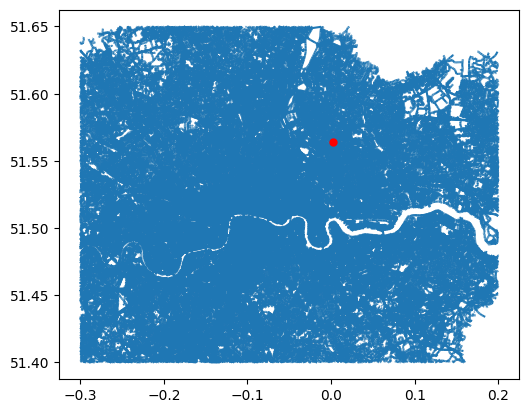

In [2]:
gdf.plot()
plt.plot(START[1], START[0], marker="o", color="red", markersize=5);

There's motivation to approximate the earth as spherical for approximating geodesic distances using numpy arrays for speed on this scale - London isn't hilly, and variation in effective spherical radius with latitude will be < 0.01% across London. For the sake of finding the nearest node, we need only use that the geodesic distance proportional to the haversine distance.

In [ ]:
from distances import get_nearest_node_index, numpy_geodesic_distance

pt = START
nearest_node_index = get_nearest_node_index(gdf_nodes, pt)
nearest_node_coords = gdf_nodes.iloc[nearest_node_index][['lat', 'lon']].values
distances = numpy_geodesic_distance(gdf_nodes[['lat', 'lon']].values, pt)
print("Nearest node index:", nearest_node_index)
print(f"Nearest node coordinates (lat, lon): {nearest_node_coords[0]:.5f}, {nearest_node_coords[1]:.5f}")
print(f"Distance to nearest node (m): {distances[nearest_node_index]:.1f}")

Nearest node index: 931181
Nearest node coordinates (lat, lon): 51.56368, 0.00198
Distance to nearest node (m): 40.7


In [ ]:
# TODOs
# TODO: Are all the points correctly ordered?
# TODO: Comparelengths to geodesic distances
# TODO: Write random walker to output a list of (directed) edges